# Deep Learning for Computer Vision:  HW 1


## Computer Science: COMS W 4995 005


### Due: September 19, 2024

#### Problem 1  (50%)

Let's start with a two class classification problem. You are asked to

1. Create your own dataset using real data. This data can be found by you online or gathered and measured by you. You are not to use datasets that others have put together, instead you are looking for raw data for a two class classification problem. The data does not have to come from images, but it is ok if it does. The data should contain 100 or more samples (more is better) from each class and the features should be at least 2 dimensional. It is ok to use Python libs, e.g. OpenCV, to extract features from your raw data. And it is ok if the labels for the classes are given by the data, or you can annotate this data yourself. 

2. Divide this data up into a training set (80%) and a test set (20%). Experiment with plotting this data in some of the raw feature dimensions much like we did in class. Hand-draw possible classifiers in these plots. 

3. Compute the prior for both classes from the data you gathered. Or if you do not believe you can determine this, assume both classes are equally likely. If you only have a couple of features, you can try to fit to a multivariate Gaussian class conditional density functions--this simply means you need to find the sample mean and sample covariance matrix for both classes from the samples. Alternatively, you can use a naive Bayes algorithm that assumes each feature is independent. But again assume a Gaussian distribution for each and find the joint probability as the product of the per feature probabilities. Plot the decision boundary for a minimum error-rate classifier assuming your fits are correct. Are these good fits to your data? How does this decision boundary differ from the one you drew by hand?

To make things more consistent, let's all use the same notation.  Let the class conditional density functions (or likelihoods) be given by $\rho({\bf x}|y_i)$ where ${\bf x}$ is your feature and $y_i$ specifies the class. Let's also assume that the priors $P(y_i)$ are the same for both classes. Hint: you can find the decision boundary by densely generating sample points ${\bf x}_j \in X$ according to your ccd's, classifying them, and then plotting and coloring them according to their predicted label.

Remember all you need to do is to use Bayes theorem to get the expression for $P(y_i|{\bf x})$, then for each sample ${\bf x}_j \in X$ choose the $i$ with the highest aposteriori probability. Do not use any statisical packages to do this other than numpy to fit to your Gaussian distribution(s).


Are these good fits to your data? How does this decision boundary differ from the one you drew by hand?
I believe these are good fits to my data given the data set at hand. When looking at the original hand-drawn boundaries they are much more accurate or better looking that that of the decision boundary generated.

#### Problem 2  (25%)

Research an application for computer vision, describe the underlying problem and the methods used to solve it. If the application was presented in popular media (e.g., NY Times), track down the scientific methods used in the academic literature. Include references. It is ok if this is related to what you are thinking about for your final project! This write-up should be a two to three pages including images and diagrams as needed. 

#### Problem 3  (25%)

Revisit Problem 2 above. Imagine that you had to build this application yourself. Using internet searches, seek out existing pre-trained deep learning models and describe how you might use these to build a ML pipeline for your use-case. Consider GitHub, Huggingface, and tech blogs and model zoos from some of the big AI companies. Include references.


Link to csv files:
Alaska pollock: https://docs.google.com/spreadsheets/d/1OCeKmmTumGDstPX1G59CqR1uBBl81JjeWO6eJmbtLYA/edit?gid=0#gid=0
Chinook salmon: https://docs.google.com/spreadsheets/d/1fBUlIr40IFnKQ7XQuUIlxZ0q2cLbteto7SFsh8XTTAA/edit?gid=0#gid=0


Link to google drive: https://drive.google.com/drive/folders/1l6cm8b8n67EODjymOwP_2stR92EPKdAf

In [23]:
!pip install pandas matplotlib

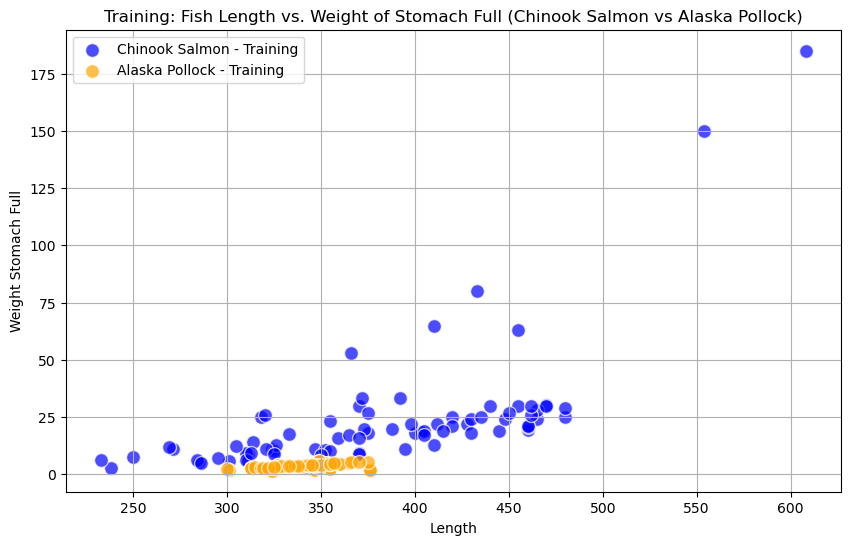

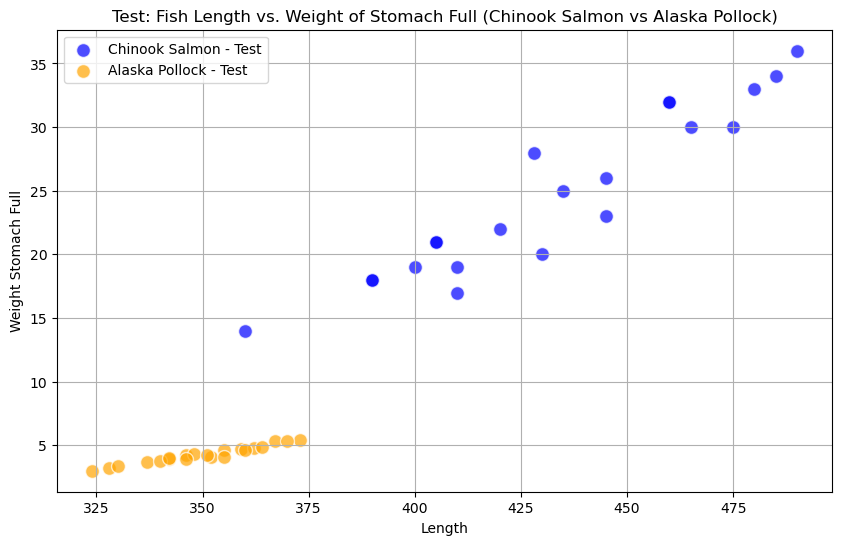

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_combined_fish_data(csv_file_1, csv_file_2):
    df1 = pd.read_csv(csv_file_1)
    df2 = pd.read_csv(csv_file_2)
    
    df1_training = df1[df1['Sets'].str.contains('traning', case=False, na=False)]
    df2_training = df2[df2['Sets'].str.contains('traning', case=False, na=False)]
    
    df1_test = df1[df1['Sets'].str.contains('test', case=False, na=False)]
    df2_test = df2[df2['Sets'].str.contains('test', case=False, na=False)]
    
    plt.figure(figsize=(10, 6))
    
   
    plt.scatter(df1_training['length'], df1_training['weight_stomach_full'], 
                alpha=0.7, edgecolors='w', s=100, label='Chinook Salmon - Training', color='blue')
    

    plt.scatter(df2_training['length'], df2_training['weight_stomach_full'], 
                alpha=0.7, edgecolors='w', s=100, label='Alaska Pollock - Training', color='orange')
    
    plt.title('Training: Fish Length vs. Weight of Stomach Full (Chinook Salmon vs Alaska Pollock)')
    plt.xlabel('Length')
    plt.ylabel('Weight Stomach Full')
    plt.legend()
    plt.grid(True)
    plt.show()
    

    plt.figure(figsize=(10, 6))
    
    
    plt.scatter(df1_test['length'], df1_test['weight_stomach_full'], 
                alpha=0.7, edgecolors='w', s=100, label='Chinook Salmon - Test', color='blue')

    plt.scatter(df2_test['length'], df2_test['weight_stomach_full'], 
                alpha=0.7, edgecolors='w', s=100, label='Alaska Pollock - Test', color='orange')
    
    plt.title('Test: Fish Length vs. Weight of Stomach Full (Chinook Salmon vs Alaska Pollock)')
    plt.xlabel('Length')
    plt.ylabel('Weight Stomach Full')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_combined_fish_data('Chinook salmon', 'Alaska pollock')


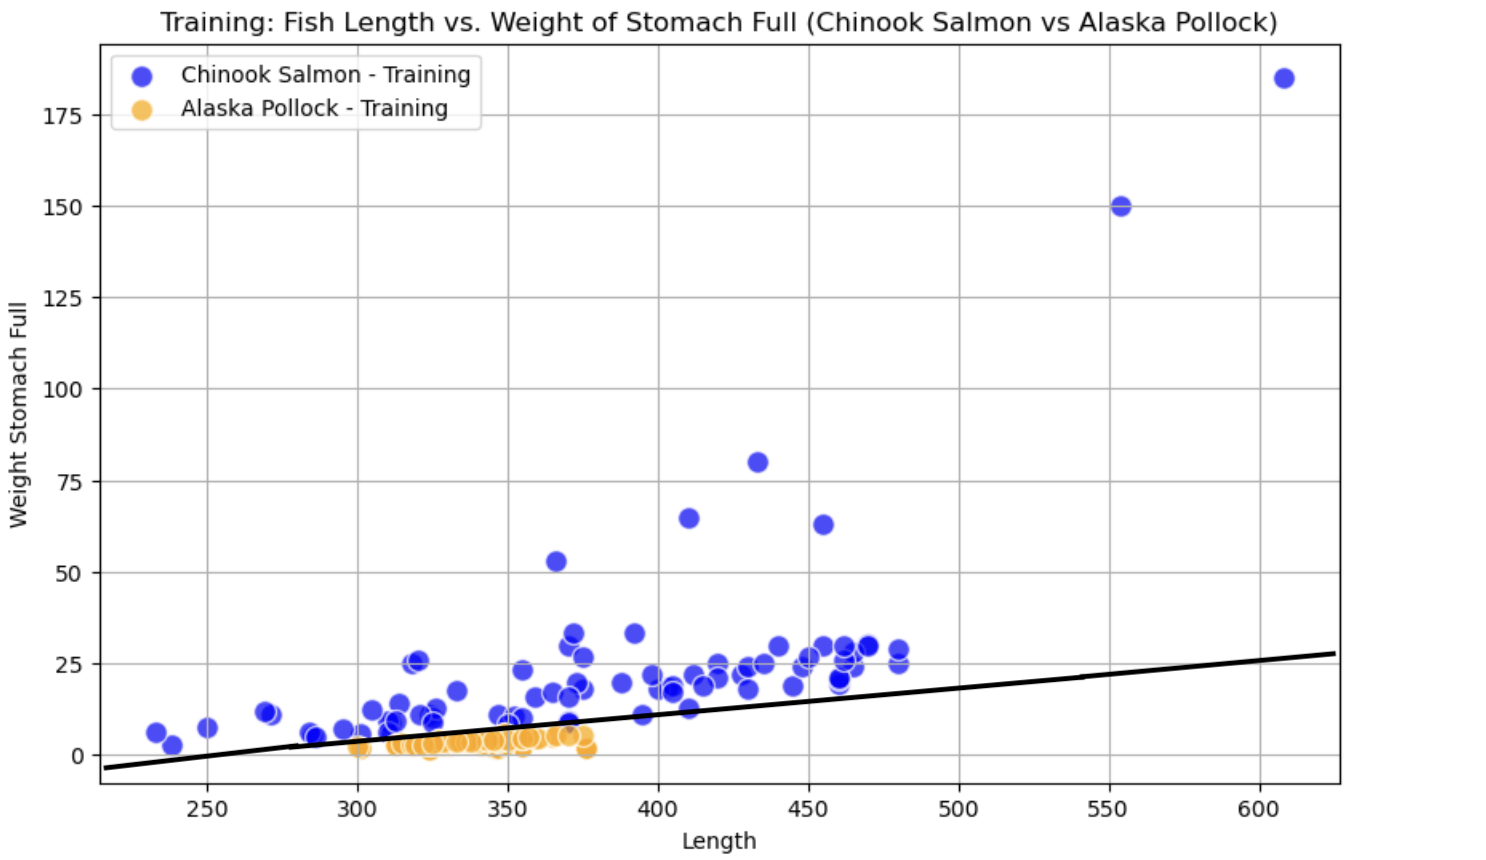

In [25]:
from IPython.display import Image, display
display(Image(filename='img1.png'))

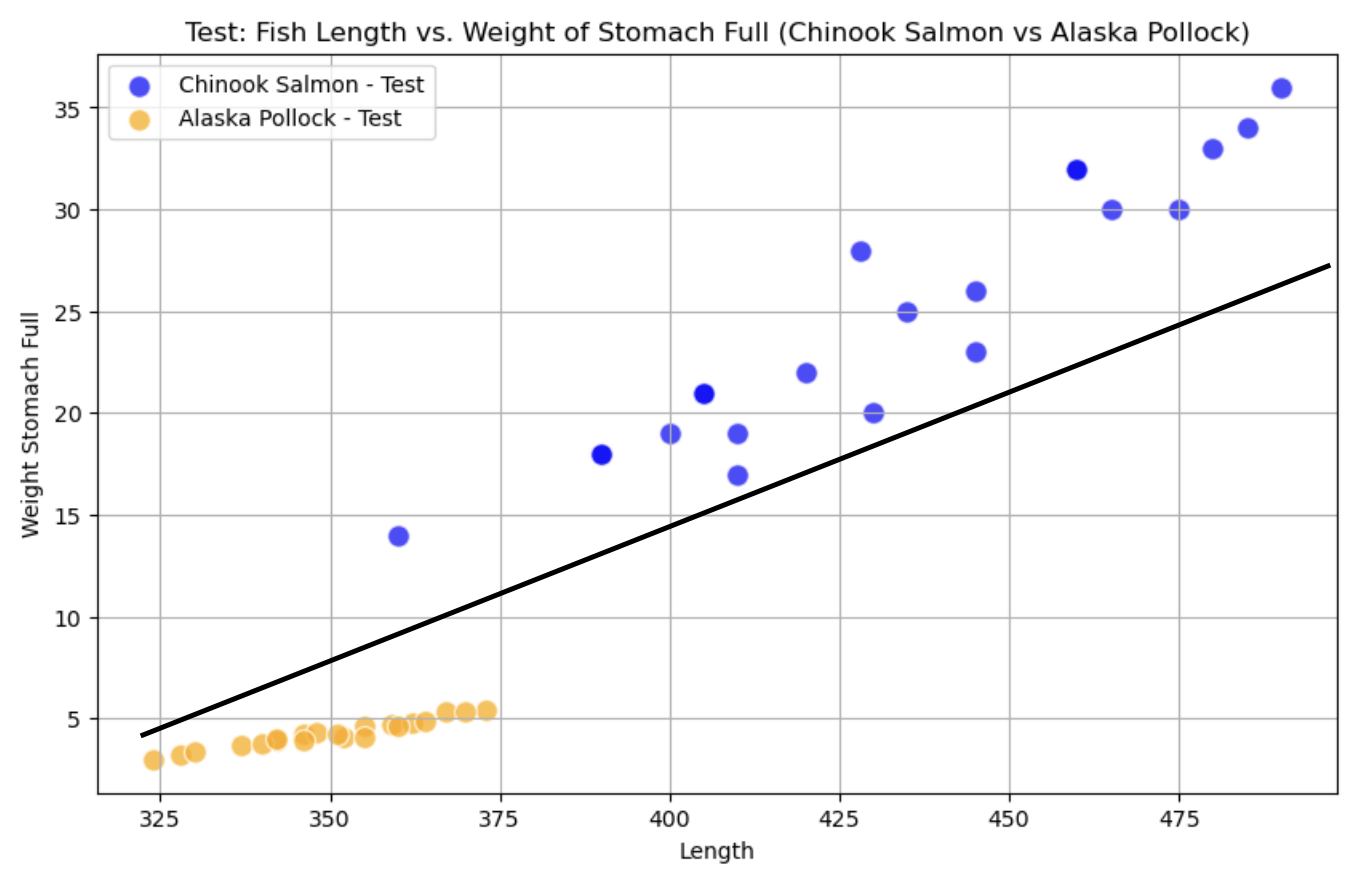

In [26]:
from IPython.display import Image, display
display(Image(filename='img2.png'))

Compute Priors

In [27]:
import pandas as pd

def compute_species_priors(csv_file_1, csv_file_2):

    df_chinook = pd.read_csv(csv_file_1)
    df_pollock = pd.read_csv(csv_file_2)
    

    df_chinook['Species'] = 'Chinook salmon'
    df_pollock['Species'] = 'Alaska pollock'
    
    df_combined = pd.concat([df_chinook, df_pollock])

    chinook_count = df_combined[df_combined['Species'] == 'Chinook salmon'].shape[0]
    pollock_count = df_combined[df_combined['Species'] == 'Alaska pollock'].shape[0]
    

    total_count = df_combined.shape[0]
    

    prior_chinook = chinook_count / total_count
    prior_pollock = pollock_count / total_count

    print(f"Prior for Chinook salmon: {prior_chinook:.4f}")
    print(f"Prior for Alaska pollock: {prior_pollock:.4f}")


compute_species_priors('Chinook salmon', 'Alaska pollock')



Prior for Chinook salmon: 0.5000
Prior for Alaska pollock: 0.5000


In [28]:
import pandas as pd

def compute_mean_covariance(csv_file_1, csv_file_2):
    df_chinook = pd.read_csv(csv_file_1)
    df_pollock = pd.read_csv(csv_file_2)
    
    chinook_data = df_chinook[['length', 'weight_stomach_full']]
    pollock_data = df_pollock[['length', 'weight_stomach_full']]
    
    def calculate_mean(data):

        n = len(data)
        means = {}
        for column in data.columns:
            total = 0
            for value in data[column]:
                total += value
            means[column] = total / n
        return means
    
    def calculate_covariance(data, means):
    
        n = len(data)
        covariance_matrix = {}
        columns = data.columns
        for i in range(len(columns)):
            for j in range(len(columns)):
                col_i = columns[i]
                col_j = columns[j]
                if (col_i, col_j) in covariance_matrix:
                    continue  
                cov = 0
                for k in range(n):
                    cov += (data.iloc[k, i] - means[col_i]) * (data.iloc[k, j] - means[col_j])
                cov /= (n - 1)
                covariance_matrix[(col_i, col_j)] = cov
                covariance_matrix[(col_j, col_i)] = cov  
        return covariance_matrix
    
    def format_covariance_matrix(cov_matrix, columns):

        matrix = []
        for col_i in columns:
            row = []
            for col_j in columns:
                row.append(cov_matrix[(col_i, col_j)])
            matrix.append(row)
       
        return pd.DataFrame(matrix, index=columns, columns=columns)

    chinook_mean = calculate_mean(chinook_data)
    pollock_mean = calculate_mean(pollock_data)
    

    chinook_cov_matrix = calculate_covariance(chinook_data, chinook_mean)
    pollock_cov_matrix = calculate_covariance(pollock_data, pollock_mean)
    

    chinook_cov = format_covariance_matrix(chinook_cov_matrix, chinook_data.columns)
    pollock_cov = format_covariance_matrix(pollock_cov_matrix, pollock_data.columns)
    
    # Display results
    print("Chinook Salmon Mean:")
    for key, value in chinook_mean.items():
        print(f"  {key}: {value}")
    print("\nChinook Salmon Covariance Matrix:")
    print(chinook_cov)
    
    print("\nAlaska Pollock Mean:")
    for key, value in pollock_mean.items():
        print(f"  {key}: {value}")
    print("\nAlaska Pollock Covariance Matrix:")
    print(pollock_cov)

compute_mean_covariance('Chinook salmon', 'Alaska pollock')



Chinook Salmon Mean:
  length: 392.08
  weight_stomach_full: 23.9315

Chinook Salmon Covariance Matrix:
                          length  weight_stomach_full
length               4796.821818          1041.103515
weight_stomach_full  1041.103515           583.562558

Alaska Pollock Mean:
  length: 340.15
  weight_stomach_full: 3.5569999999999995

Alaska Pollock Covariance Matrix:
                         length  weight_stomach_full
length               310.148990            10.004495
weight_stomach_full   10.004495             1.023082


In [29]:
import numpy as np
means = {
    'Chinook salmon': np.array([392.0800, 23.9315]),
    'Alaska pollock': np.array([340.150, 3.557])
}
covariances = {
    'Chinook salmon': np.array([[4796.821818, 1041.103515],[1041.103515,  583.562558]]),
    'Alaska pollock': np.array([[310.148990, 10.004495],[10.004495, 1.023082]])
}


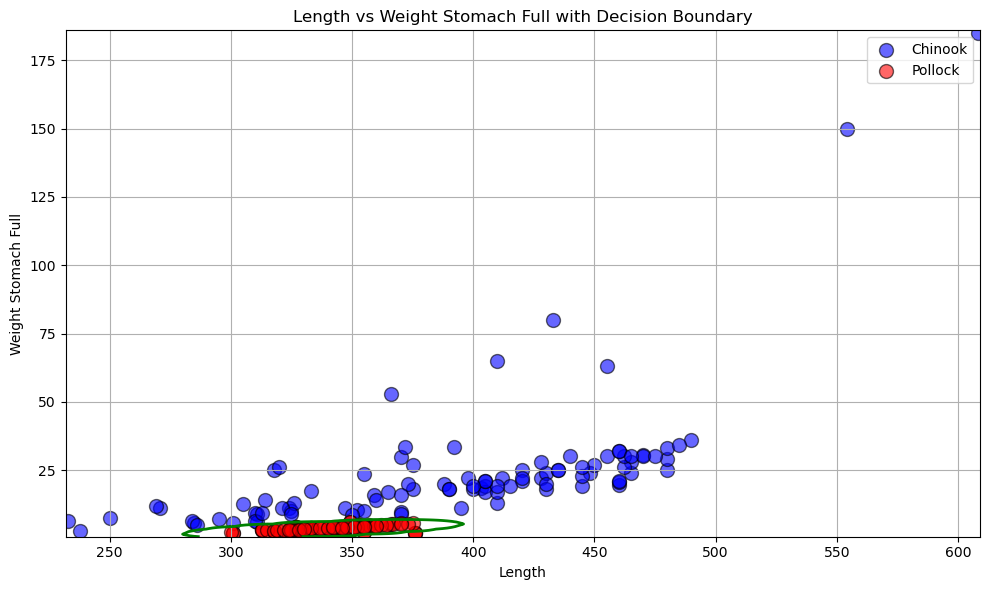

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def multivariate_normal_pdf(x, mean, cov):
    n_features = mean.shape[0]
    det_cov = np.linalg.det(cov)
    if det_cov == 0:
        raise ValueError("The covariance matrix can't be singular.")
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), n_features / 2) * np.sqrt(det_cov))
    x_mu = x - mean
    exponent = -0.5 * np.einsum('ij,ij->i', x_mu @ inv_cov, x_mu)
    return norm_const * np.exp(exponent)


df_chinook = pd.read_csv('Chinook salmon')
df_pollock = pd.read_csv('Alaska pollock')  


df_pollock = df_pollock[['length', 'weight_stomach_full']]


means = {
    'Chinook': np.array([392.0800, 23.9315]),
    'Pollock': np.array([340.150, 3.557])
}
covariances = {
    'Chinook': np.array([[4796.821818, 1041.103515],[1041.103515,  583.562558]]),
    'Pollock': np.array([[310.148990, 10.004495],[10.004495, 1.023082]])
}


x_min = min(df_chinook['length'].min(), df_pollock['length'].min()) - 1
x_max = max(df_chinook['length'].max(), df_pollock['length'].max()) + 1
y_min = min(df_chinook['weight_stomach_full'].min(), df_pollock['weight_stomach_full'].min()) - 1
y_max = max(df_chinook['weight_stomach_full'].max(), df_pollock['weight_stomach_full'].max()) + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]


z_chinook = multivariate_normal_pdf(grid_points, means['Chinook'], covariances['Chinook']).reshape(xx.shape)
z_pollock = multivariate_normal_pdf(grid_points, means['Pollock'], covariances['Pollock']).reshape(xx.shape)


decision_boundary = z_chinook - z_pollock


plt.figure(figsize=(10, 6))


plt.scatter(df_chinook['length'], df_chinook['weight_stomach_full'],
            c='blue', label='Chinook', edgecolor='k', s=100, alpha=0.6)


plt.scatter(df_pollock['length'], df_pollock['weight_stomach_full'],
            c='red', label='Pollock', edgecolor='k', s=100, alpha=0.6)


plt.contour(xx, yy, decision_boundary, levels=[0], linewidths=2, colors='green')

plt.xlabel('Length')
plt.ylabel('Weight Stomach Full')
plt.title('Length vs Weight Stomach Full with Decision Boundary')


plt.legend()


plt.grid(True)
plt.tight_layout()


plt.show()
